# Compare two GCHP datasets

## Overview of this Notebook

* Import dependencies
* Define data directories and global variables
* Compare SpeciesConc diagnostic collection

NOTE: Use this notebook with the 1mo_benchmark branch of gcpy

## Import dependencies

In [14]:
import os
import numpy as np
import xarray as xr
import gcpy

# Enable auto-reloading modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define directories and global information

In [85]:
# Shared high-level directory
testdir = '/Users/lizzielundgren/gc/benchmark/multirun'

# Ref and dev run output directories
refdir = os.path.join(testdir,'single')
devdir = os.path.join(testdir,'multi_add2intstate_chkptRst')

# Ref and dev strings (for use in plots and messages)
refstr='Single run, 2nd month'
#devstr='Multi-run with updated int state, 2nd month'
devstr='Multi-run with updated int state, 2nd month'

# Set directory to store plots
plotsdir = os.path.join(testdir,'plots/single_vs_multi_add2intstate')

# Set directory to store regridding weights
weightsdir = '/Users/lizzielundgren/gc/weights'

# Check that paths exist
gcpy.check_paths(refdir, devdir)

Path 1 exists: /Users/lizzielundgren/gc/benchmark/multirun/single
Path 2 exists: /Users/lizzielundgren/gc/benchmark/multirun/multi_add2intstate_chkptRst


### Print Ref netcdf filenames

In [40]:
reffiles = [k for k in os.listdir(refdir) if '.nc' in k]
for k in reffiles:
    print(k)

gcchem_internal_checkpoint_c48.nc
GCHP.SpeciesConc_avg.20160816_1200z.nc4


### Print Dev netcdf filenames

In [41]:
devfiles = [k for k in os.listdir(devdir) if '.nc' in k]
for k in devfiles:
    print(k)

GCHP.Emissions.20160816_1200z.nc4
GCHP.StateChm.20160816_1200z.nc4
GCHP.StateMet_inst.20160801_0000z.nc4
GCHP.WetLossConv.20160816_1200z.nc4
GCHP.Aerosols.20160816_1200z.nc4
GCHP.SpeciesConc_avg.20160816_1200z.nc4
GCHP.AerosolMass.20160816_1200z.nc4
GCHP.SpeciesConc_inst.20160801_0000z.nc4
GCHP.Budget.20160816_1200z.nc4
GCHP.JValues.20160816_1200z.nc4
GCHP.CloudConvFlux.20160816_1200z.nc4
GCHP.ConcAfterChem.20160816_1200z.nc4
GCHP.DryDep.20160816_1200z.nc4
GCHP.StateMet_avg.20160816_1200z.nc4
GCHP.LevelEdgeDiags.20160816_1200z.nc4
GCHP.WetLossLS.20160816_1200z.nc4
GCHP.ProdLoss.20160816_1200z.nc4


## Inspect restart files at end of run

In [81]:
refdata = xr.open_dataset(os.path.join(refdir,'gcchem_internal_checkpoint_c48.nc'))
devdata = xr.open_dataset(os.path.join(devdir,'gcchem_internal_checkpoint_c48.nc'))

In [82]:
[commonvars, commonvars2D, commonvars3D, commonvars4D] = gcpy.compare_varnames(refdata, devdata)

292 common variables
0 variables in ref only
5 variables in dev only (skip)
   Variable names: ['DryDepNitrogen', 'H2O2AfterChem', 'KPPHvalue', 'SO2AfterChem', 'WetDepNitrogen']
All variables have same dimensions in ref and dev


In [83]:
varlist = commonvars
pdfname = os.path.join(plotsdir,'Checkpoint_20160901_Surface.pdf')
gcpy.compare_gchp_single_level(refdata, refstr, devdata, devstr, varlist=varlist, ilev=0,
                     weightsdir=weightsdir, savepdf=True, pdfname=pdfname, flip_vert=True )
gcpy.add_bookmarks_to_pdf( pdfname, varlist)


Creating /Users/lizzielundgren/gc/benchmark/multirun/plots/single_vs_multi_12.1.1/Checkpoint_20160901.pdf for 292 variables
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 2

In [87]:
# Zonal mean
varlist = commonvars3D
pdfname = os.path.join(plotsdir,'Checkpoint_20160901_ZonalMean.pdf'.format(collection))
gcpy.compare_gchp_zonal_mean(refdata, refstr, devdata, devstr, varlist=varlist, 
                   weightsdir=weightsdir, savepdf=True, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist)

Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc

Cre

## Inspect time-averaged species concentration diagnostic

In [88]:
day = '20160816'
time = '1200'
collection = 'SpeciesConc_avg'
refdata = gcpy.get_gchp_collection_data(refdir, collection, day, time)
devdata = gcpy.get_gchp_collection_data(devdir, collection, day, time)

In [89]:
[commonvars, commonvars1D, commonvars2D, commonvars3D] = gcpy.compare_varnames(refdata, devdata)

183 common variables
0 variables in ref only
0 variables in dev only
All variables have same dimensions in ref and dev


In [90]:
CFCs=[k for k in commonvars if 'CFC' in k]
print(CFCs)

['SpeciesConc_CFC11', 'SpeciesConc_CFC113', 'SpeciesConc_CFC114', 'SpeciesConc_CFC115', 'SpeciesConc_CFC12', 'SpeciesConc_HCFC123', 'SpeciesConc_HCFC141b', 'SpeciesConc_HCFC142b', 'SpeciesConc_HCFC22']


In [91]:
varname='SpeciesConc_O3'
gcpy.get_stats(refdata, refstr, devdata, devstr, varname)

Data units: mol mol-1 dry
Array sizes:
    Single run, 2nd month:  (1, 72, 288, 48)
    Multi-run with updated int state, 2nd month:  (1, 72, 288, 48)
Global stats:
  Mean:
    Single run, 2nd month:  1.8323707990930416e-06
    Multi-run with updated int state, 2nd month:  1.8325137034480576e-06
  Min:
    Single run, 2nd month:  2.618878225391086e-09
    Multi-run with updated int state, 2nd month:  2.603014692681427e-09
  Max:
    Single run, 2nd month:  1.015227007883368e-05
    Multi-run with updated int state, 2nd month:  1.0150354682991747e-05
  Sum:
    Single run, 2nd month:  1.8238098621368408
    Multi-run with updated int state, 2nd month:  1.8239521980285645


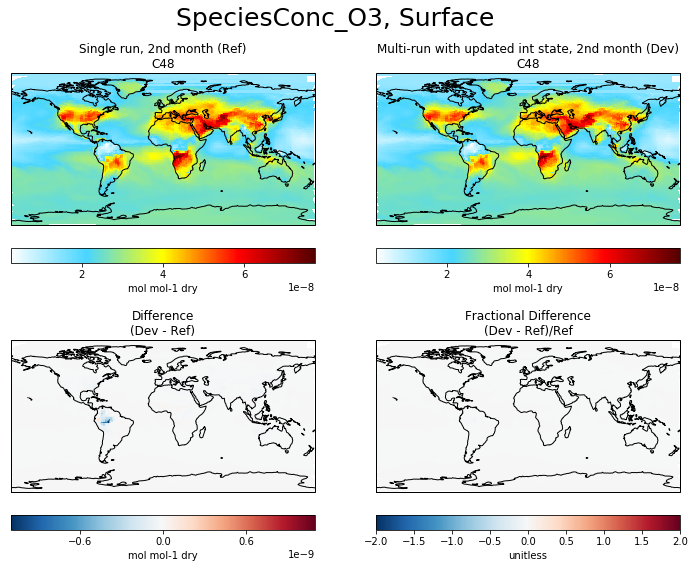

In [92]:
gcpy.compare_gchp_single_level(refdata, refstr, devdata, devstr, ilev=0, varlist=[varname], weightsdir=weightsdir)

Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc


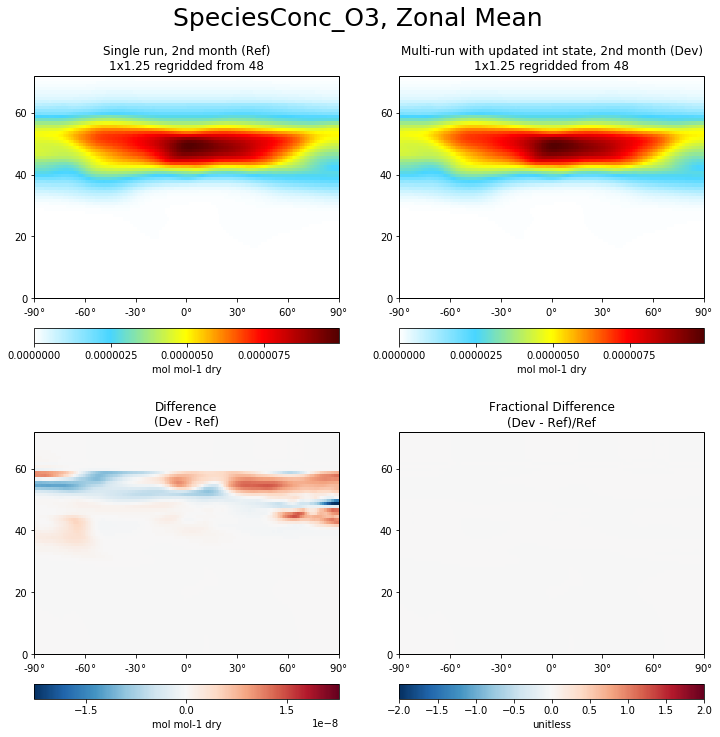

In [93]:
gcpy.compare_gchp_zonal_mean(refdata, refstr, devdata, devstr, varlist=[varname], weightsdir=weightsdir )

## Create PDF for list of species

In [26]:
# Define subset of variables in files
varlist = commonvars3D
#varlist = [varname]
#varlist = [k for k in commonvars3D if 'CFC' in k]

In [27]:
# Surface
pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format(collection))
#pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format(varname))
#pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format('CFCs'))
gcpy.compare_gchp_single_level(refdata, refstr, devdata, devstr, varlist=varlist, ilev=0,
                     weightsdir=weightsdir, savepdf=True, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')


Creating /Users/lizzielundgren/gc/benchmark/multirun/plots/single_vs_multi_12.1.1/SpeciesConc_avg_Surface.pdf for 183 variables
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 

In [28]:
# Zonal mean
pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format(collection))
#pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format(varname))
#pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format('CFCs'))
gcpy.compare_gchp_zonal_mean(refdata, refstr, devdata, devstr, varlist=varlist, 
                   weightsdir=weightsdir, savepdf=True, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc

Cre